# Import Library


Bagian ini mengimpor pustaka-pustaka yang diperlukan untuk analisis data dan pembuatan model pembelajaran mesin.

- **TensorFlow** digunakan sebagai kerangka kerja utama untuk membangun dan melatih model pembelajaran mesin, terutama deep learning.  
- **NumPy** digunakan untuk komputasi numerik, seperti manipulasi array atau matriks.  
- **Pandas** digunakan untuk manipulasi data dalam bentuk tabel (DataFrame), yang sangat berguna untuk analisis data.  
- **Matplotlib** dan **Seaborn** digunakan untuk visualisasi data. Matplotlib menyediakan fleksibilitas untuk membuat berbagai jenis grafik, sementara Seaborn memberikan visualisasi yang lebih estetis dan berfokus pada statistik.  
- Dari **Scikit-learn**, modul-modul yang diimpor mencakup preprocessing data (mengisi nilai yang hilang dan normalisasi), evaluasi model (metrik seperti laporan klasifikasi, matriks kebingungan, dan kurva ROC), serta pembagian data untuk validasi silang.  
- **imbalanced-learn** digunakan untuk menangani masalah data tidak seimbang dengan teknik seperti Random Over-Sampling.

Pustaka-pustaka ini memungkinkan pengolahan data dan evaluasi model dilakukan secara menyeluruh, mulai dari preprocessing hingga evaluasi hasil.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler

# Load Data
Bagian ini bertujuan untuk membaca dataset yang akan digunakan dan memberikan gambaran awal mengenai struktur data

Dataset diambil dari sumber eksternal menggunakan fungsi `pd.read_csv()`. Dataset ini dimuat ke dalam DataFrame Pandas untuk analisis lebih lanjut. Dataset yang digunakan berisi data terkait deteksi penyakit jantung berdasarkan studi Framingham.

In [ ]:
url = 'https://raw.githubusercontent.com/rifasania/Heart-Disease-Detection/main/framingham.csv'
data = pd.read_csv(url)

Fungsi `data.head()` digunakan untuk menampilkan lima baris pertama dari dataset. Hal ini berguna untuk memeriksa format data, jenis kolom, dan nilai awal dataset.

In [ ]:
# Melihat beberapa baris pertama
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Fungsi `data.info()` digunakan untuk menampilkan informasi detail tentang dataset, seperti jumlah baris dan kolom, nama kolom, tipe data setiap kolom, dan jumlah nilai non-null di setiap kolom. Informasi ini membantu dalam memahami kualitas data, termasuk apakah terdapat nilai yang hilang.

In [ ]:
# Info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Hasil dari `data.info()` memberikan gambaran menyeluruh tentang struktur dataset, termasuk jumlah data, tipe data, dan nilai yang hilang pada setiap kolom:

1. **Jenis Objek DataFrame**  
   Dataset merupakan objek `pandas.core.frame.DataFrame` yang digunakan untuk mengelola data dalam format tabel.

2. **Jumlah Baris dan Kolom**  
   - Dataset memiliki **4240 entri** (baris), yang diberi indeks dari 0 hingga 4239.  
   - Terdapat **16 kolom**, masing-masing menyimpan fitur atau atribut terkait deteksi penyakit jantung.

3. **Nama Kolom dan Jumlah Nilai Non-Null**  
   - Kolom seperti `male`, `age`, `currentSmoker`, `prevalentStroke`, dll., tidak memiliki nilai yang hilang (**4240 non-null**) dan sudah lengkap.  
   - Beberapa kolom, seperti `education`, `cigsPerDay`, `BPMeds`, `totChol`, `BMI`, `heartRate`, dan `glucose`, memiliki nilai yang hilang karena jumlah nilai non-null lebih kecil dari total baris (4240). Hal ini menunjukkan perlunya penanganan nilai yang hilang pada tahap preprocessing.

4. **Tipe Data Setiap Kolom**  
   - Kolom dengan tipe **`int64`** berisi data numerik diskrit (bilangan bulat), seperti `male`, `age`, `currentSmoker`, dan `TenYearCHD`.  
   - Kolom dengan tipe **`float64`** berisi data numerik kontinu (bilangan desimal), seperti `cigsPerDay`, `totChol`, dan `BMI`.

5. **Penggunaan Memori**  
   Dataset memerlukan **530.1 KB** ruang memori. Hal ini penting untuk memastikan bahwa dataset dapat ditangani secara efisien oleh sistem.

6. **Fitur-Fitur Data**  
   - **`male`**: Jenis kelamin (0 = perempuan, 1 = laki-laki).  
   - **`age`**: Usia peserta (tahun).  
   - **`education`**: Tingkat pendidikan.  
   - **`currentSmoker`**: Status perokok (0 = bukan perokok, 1 = perokok).  
   - **`cigsPerDay`**: Jumlah rokok yang dihisap per hari.  
   - **`BPMeds`**: Konsumsi obat tekanan darah (0 = tidak, 1 = ya).  
   - **`prevalentStroke`**: Riwayat stroke (0 = tidak, 1 = ya).  
   - **`prevalentHyp`**: Hipertensi (0 = tidak, 1 = ya).  
   - **`diabetes`**: Diabetes (0 = tidak, 1 = ya).  
   - **`totChol`**: Total kolesterol.  
   - **`sysBP`**: Tekanan darah sistolik.  
   - **`diaBP`**: Tekanan darah diastolik.  
   - **`BMI`**: Indeks massa tubuh (Body Mass Index).  
   - **`heartRate`**: Denyut jantung (bpm).  
   - **`glucose`**: Kadar glukosa dalam darah.  
   - **`TenYearCHD`**: Risiko penyakit jantung koroner dalam 10 tahun (0 = tidak, 1 = ya).

# Preprocessing

Bagian ini bertujuan untuk mempersiapkan data agar siap digunakan dalam proses pelatihan model pembelajaran mesin.

###Memisahkan Variabel Target dan Fitur

Variabel target (y) adalah kolom `TenYearCHD`, yang menunjukkan risiko penyakit jantung dalam 10 tahun.
Fitur lainnya disimpan dalam variabel X dengan cara menghapus kolom `TenYearCHD` dari dataset.

In [ ]:
# Memisahkan variabel target
y = data["TenYearCHD"]
X = data.drop("TenYearCHD", axis=1)

In [ ]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


###Memeriksa Nilai yang Hilang

Fungsi `data.isnull().sum()` digunakan untuk menghitung jumlah nilai yang hilang pada setiap kolom. Langkah ini penting untuk memahami sejauh mana masalah nilai yang hilang memengaruhi dataset.

In [ ]:
# Cek nilai null
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


Hasil menunjukkan jumlah nilai null (hilang) pada masing-masing kolom dalam dataset. Nilai null ini perlu ditangani karena dapat memengaruhi kualitas model pembelajaran mesin yang akan dibangun. Berikut adalah detail untuk setiap kolom:

####Kolom Tanpa Nilai Null
Kolom berikut memiliki 0 nilai null, artinya data lengkap tersedia untuk semua entri:

- male
- age
- currentSmoker
- prevalentStroke
- prevalentHyp
- diabetes
- sysBP
- diaBP
- TenYearCHD

####Kolom dengan Nilai Null

- education: Terdapat 105 nilai null, yang mungkin terjadi karena peserta tidak memberikan informasi terkait tingkat pendidikan mereka.
- cigsPerDay: Terdapat 29 nilai null.
- BPMeds: Terdapat 53 nilai null, yang bisa menunjukkan bahwa informasi tentang konsumsi obat tekanan darah tidak tersedia untuk beberapa peserta.
- totChol: Terdapat 50 nilai null, yang menunjukkan ada peserta yang tidak memiliki data total kolesterol.
- BMI: Terdapat 19 nilai null, yang menunjukkan beberapa peserta tidak mencatat berat badan atau tinggi badan mereka.
- heartRate: Terdapat 1 nilai null.
- glucose: Terdapat 388 nilai null, menjadikannya kolom dengan nilai hilang terbanyak.


###Menangani Nilai yang Hilang

Nilai yang hilang pada X diisi dengan rata-rata dari masing-masing kolom menggunakan `X.fillna(X.mean())`. Teknik ini adalah salah satu metode imputasi yang sederhana namun efektif untuk dataset dengan jumlah nilai hilang yang tidak terlalu besar.

In [ ]:
# Handle missing value (mengisi data kosong)
X = X.fillna(X.mean())

In [ ]:
X.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


###Normalisasi Fitur

Normalisasi dilakukan untuk memastikan semua fitur berada pada skala yang sama, sehingga model dapat bekerja lebih optimal.
StandardScaler digunakan untuk menstandarisasi data dengan mean 0 dan standar deviasi 1. Fitur yang sudah dinormalisasi disimpan di variabel `X_scaled`.

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [ ]:
print(X_train.shape, X_test.shape)

(5753, 15) (1439, 15)


`print(X_train.shape, X_test.shape)` digunakan untuk menampilkan dimensi dari data `X_train` dan `X_test`, yang biasanya merupakan data pelatihan (training) dan pengujian (testing) dalam proses pembelajaran mesin (machine learning).

Hasil (5753, 15) dan (1439, 15) menunjukkan:

X_train.shape = (5753, 15)

- Ada 5753 baris data dalam dataset pelatihan. Setiap baris biasanya mewakili satu sampel.
- Ada 15 fitur (kolom) dalam dataset, yang merupakan variabel yang digunakan untuk melatih model.

X_test.shape = (1439, 15)

- Ada 1439 baris data dalam dataset pengujian. Dataset ini digunakan untuk menguji kinerja model setelah pelatihan.
- Dataset pengujian juga memiliki 15 fitur, karena dataset pelatihan dan pengujian harus memiliki jumlah fitur yang sama agar model dapat memprosesnya dengan benar.

###Menyeimbangkan Data

Karena dataset mungkin memiliki distribusi kelas yang tidak seimbang (misalnya, jumlah kelas 0 jauh lebih banyak daripada kelas 1), teknik oversampling dilakukan menggunakan RandomOverSampler dari imbalanced-learn.
Oversampling ini menambahkan sampel pada kelas minoritas sehingga distribusi kelas menjadi seimbang. Distribusi kelas sebelum dan setelah oversampling diperiksa menggunakan Counter.

In [ ]:
# Menyeimbangkan data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


### Mengecek distribusi kelas setelah oversampling
Proses ini digunakan untuk memeriksa distribusi kelas pada data target sebelum dan sesudah oversampling. Oversampling dilakukan untuk mengatasi ketidakseimbangan data dengan menambahkan sampel pada kelas minoritas. Modul collections menyediakan fungsi Counter yang digunakan untuk menghitung jumlah sampel di setiap kelas. Dengan menampilkan distribusi kelas sebelum dan sesudah oversampling, kita dapat memastikan apakah proses oversampling berhasil menyeimbangkan data.

In [ ]:
# Mengecek distribusi kelas setelah oversampling
from collections import Counter
print(f"Sebelum oversampling: {Counter(y)}")
print(f"Setelah oversampling: {Counter(y_resampled)}")

Sebelum oversampling: Counter({0: 3596, 1: 644})
Setelah oversampling: Counter({0: 3596, 1: 3596})


Hasil diatas menunjukkan distribusi kelas dalam data target **`y`** sebelum dan setelah proses **oversampling**.

1. **Sebelum oversampling: `Counter({0: 3596, 1: 644})`**
   - Kelas **0** memiliki **3596 sampel**, sedangkan kelas **1** hanya memiliki **644 sampel**.
   - Artinya, dataset ini memiliki ketidakseimbangan kelas yang cukup besar, di mana kelas 0 (kemungkinan kelas mayoritas) jauh lebih banyak daripada kelas 1 (kelas minoritas).

2. **Setelah oversampling: `Counter({0: 3596, 1: 3596})`**
   - Setelah oversampling, kelas **1** telah diperbanyak sehingga jumlah sampelnya sama dengan kelas **0**, yaitu **3596 sampel**.
   - Dengan demikian, kedua kelas sekarang memiliki jumlah sampel yang seimbang, yaitu **3596 sampel untuk masing-masing kelas**.

Proses ini bertujuan untuk mengurangi bias model terhadap kelas mayoritas dan memberikan kesempatan yang lebih baik bagi model untuk mempelajari pola dari kedua kelas secara adil.

###Split Data

Proses ini membagi data yang telah dioversample menjadi dua set: satu untuk pelatihan (training) dan satu untuk pengujian (testing). Data pelatihan akan digunakan untuk melatih model, sementara data pengujian akan digunakan untuk mengevaluasi kinerja model setelah pelatihan. Fungsi train_test_split dari sklearn.model_selection digunakan untuk melakukan pembagian ini.

In [ ]:
# Split data
X_train, X_test, Y_train, Y_test = skm.train_test_split(X_resampled, y_resampled, test_size=0.2)

# Buat Model

Model yang digunakan adalah Deep Neural Network (DNN) yang dibuat menggunakan TensorFlow dan Keras. Berikut adalah detail arsitektur model:

Input Layer:



*   Menggunakan jumlah fitur dari dataset sebagai input.
*   `shape=(X_train.shape[1],)` sesuai dengan jumlah fitur dalam data latih.



Hidden Layers:


*   128 neuron dengan aktivasi ReLU.
*   64 neuron dengan aktivasi ReLU.
*   32 neuron dengan aktivasi ReLU.



Output Layer:


*   1 neuron dengan aktivasi sigmoid untuk klasifikasi biner.





Optimizer:



*   Adam optimizer dengan learning rate 0.001.



Loss Function:
*   Binary Crossentropy karena target adalah klasifikasi biner.



Metric:


*   Accuracy digunakan untuk memantau performa selama pelatihan.





In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(name="Input", shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1,name="Output", activation="sigmoid"))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                     │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

### Early Stopping

Digunakan untuk menghindari overfitting dengan memonitor val_loss.

Parameter:


*   `patience=10`: Menghentikan pelatihan jika val_loss tidak membaik setelah 10 epoch.
*   `restore_best_weights=True`: Mengembalikan bobot terbaik setelah pelatihan dihentikan.



In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Melatih Model

Model dilatih selama 20 epoch dengan batch size 32 dan validation split 20%.

In [ ]:
# Train model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6293 - loss: 0.6388 - val_accuracy: 0.6725 - val_loss: 0.6094
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.5798 - val_accuracy: 0.6950 - val_loss: 0.5937
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7106 - loss: 0.5577 - val_accuracy: 0.7072 - val_loss: 0.5752
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7146 - loss: 0.5482 - val_accuracy: 0.7228 - val_loss: 0.5694
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7364 - loss: 0.5302 - val_accuracy: 0.7202 - val_loss: 0.5647
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.5219 - val_accuracy: 0.7255 - val_loss: 0.5702
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7551 - loss: 0.4932 - val_accuracy: 0.7472 - val_loss: 0.5305
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7849 - loss: 0.4677 - val_accuracy: 0.

# Evaluasi Model

### Grafik Training dan Validation

Text(0, 0.5, 'loss')

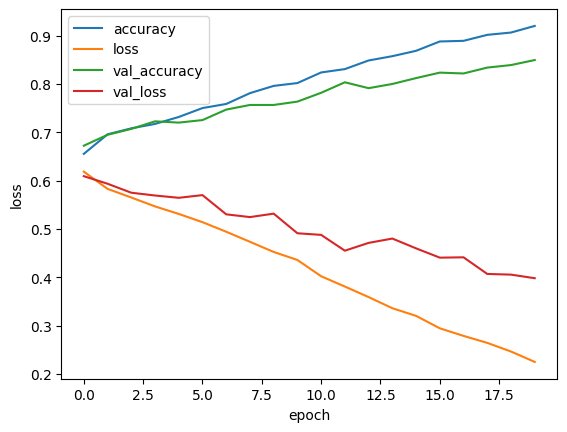

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.ylabel("loss")

Accuracy dan Validation Accuracy:


*   Grafik menunjukkan bahwa training accuracy (biru) dan validation accuracy (hijau) meningkat secara stabil tanpa ada perbedaan signifikan di antara keduanya. Hal ini menunjukkan bahwa model tidak mengalami overfitting.



Loss dan Validation Loss:


*   Training loss (oranye) dan validation loss (merah) menurun dengan pola serupa, tanpa fluktuasi besar pada validation loss. Ini juga menunjukkan stabilitas model dan generalisasi yang baik.



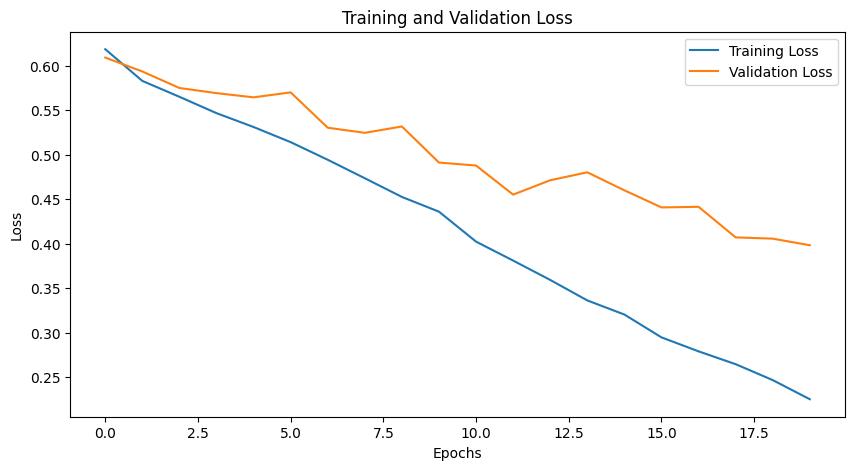

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

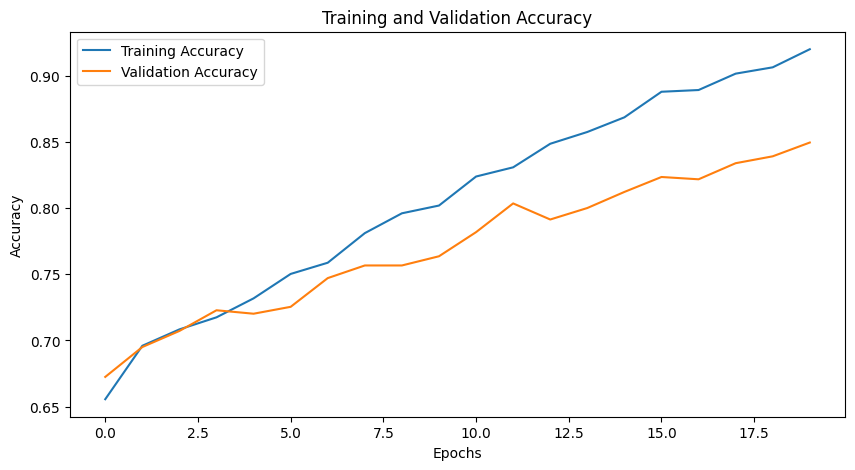

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
Y_pred_proba = model.predict(X_test)
Y_pred = (Y_pred_proba > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Classification Report (Precision, Recall, F1-Score)

In [ ]:
# Classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       702
           1       0.79      0.91      0.84       737

    accuracy                           0.83      1439
   macro avg       0.84      0.83      0.83      1439
weighted avg       0.84      0.83      0.83      1439





*   Model memiliki kinerja baik dengan akurasi keseluruhan 83%.
*   Kelas 1 (positif) memiliki recall lebih tinggi (91%), yang berarti model sangat baik dalam mendeteksi positif. Hal ini penting jika data positif lebih kritis.
*   Kelas 0 (negatif) memiliki precision lebih tinggi (88%), yang berarti model menghindari terlalu banyak prediksi negatif yang salah (False Positives).





### Confusion Matrix

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[525 177]
 [ 70 667]]




*   True Positives (667): Data positif yang berhasil diprediksi dengan benar.
*   True Negatives (525): Data negatif yang berhasil diprediksi dengan benar.
*   False Positives (177): Data negatif yang salah diprediksi sebagai positif.
*   False Negatives (70): Data positif yang salah diprediksi sebagai negatif.

Kesimpulan Hasil Confusion Matrix:


*   Model memiliki lebih sedikit False Negatives (70) dibandingkan False Positives (177). Artinya, model lebih baik dalam mengenali positif dibandingkan negatif.
*   Untuk kasus di mana False Negatives lebih kritis (misalnya mendeteksi penyakit), ini adalah hasil yang cukup baik.







### ROC-AUC Score

In [ ]:
# ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8939993119097597


ROC-AUC score: 0.894

Skor ini sangat baik karena mendekati 1.0. Artinya, model memiliki kemampuan yang tinggi dalam membedakan antara kelas positif dan negatif.


### Grafik ROC-AUC Score

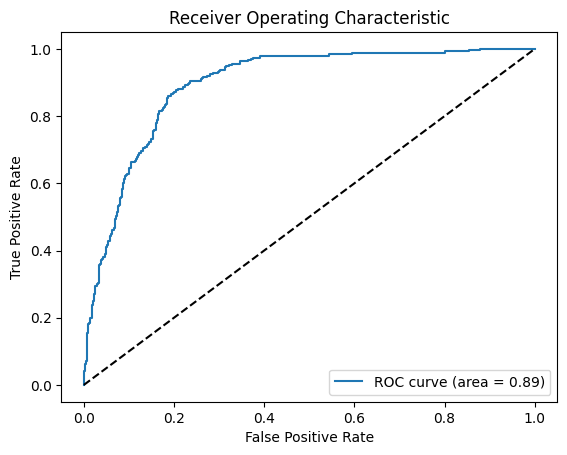

In [ ]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Grafik ROC menunjukkan area di bawah kurva yang tinggi, menunjukkan model memiliki performa yang baik dalam membedakan antara kelas positif dan negatif.

### Evaluasi model berdasarkan data test

In [ ]:
predict = model.predict(X_test)
model.evaluate(X_test, Y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8184 - loss: 0.4282


[0.4336344599723816, 0.8283530473709106]



*   0.4336:
Nilai loss yang dihitung pada data uji. Ini sedikit berbeda dari nilai 0.4282 karena dihitung pada batch terakhir atau mungkin terdapat rounding dalam log output.
*   0.8284:
Akurasi model sebesar 82.84% setelah pengujian akhir.



In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.2f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8184 - loss: 0.4282
Test Accuracy: 0.83


### Evaluasi model berdasarkan data train

In [ ]:
predict = model.predict(X_train)
model.evaluate(X_train, Y_train)

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9364 - loss: 0.2027


[0.23822230100631714, 0.9181296825408936]



*   0.2382:
Nilai loss pada data training. Ini sedikit berbeda dari 0.2027 karena mungkin hasil rata-rata dari seluruh batch yang diproses.
*   0.9181:
Akurasi model sebesar 91.81% pada data training setelah evaluasi akhir.



# Analisis Fitur dengan SHAP Values

PermutationExplainer explainer: 1440it [05:36,  4.21it/s]


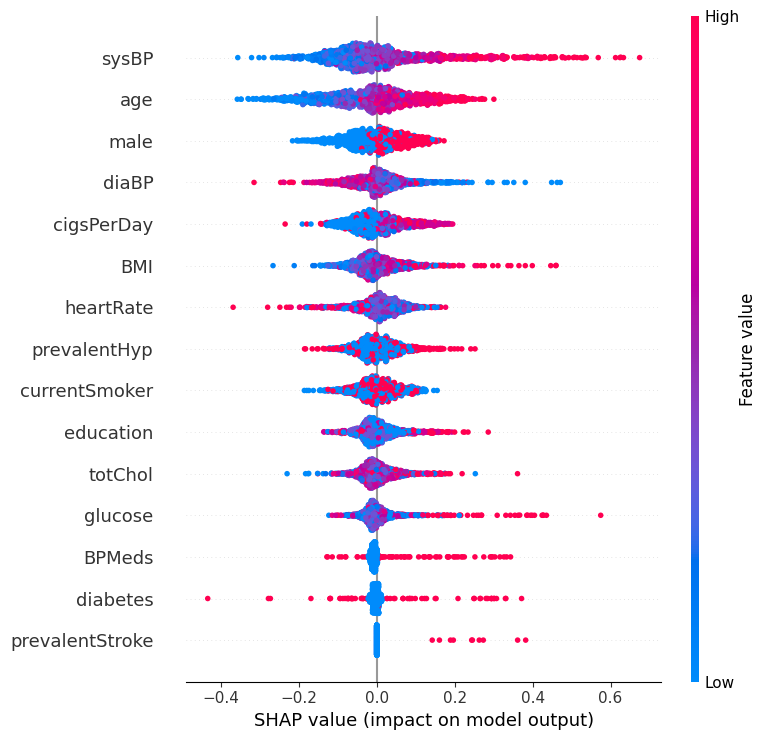

In [ ]:
import shap

feature_names = [
    "male", "age", "education", "currentSmoker", "cigsPerDay",
    "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes",
    "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"
]

# Konversi X_test ke DataFrame dengan nama kolom
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Inisialisasi eksplainer SHAP
explainer = shap.Explainer(model, X_train)  # Model adalah DNN Anda, dan X_train adalah fitur pelatihan

# Hitung nilai SHAP
shap_values = explainer(X_test)  # X_test adalah data uji atau subset data yang ingin dianalisis

# Grafik summary plot untuk melihat kontribusi semua fitur
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

Berdasarkan analisis SHAP, beberapa fitur memiliki pengaruh signifikan terhadap prediksi model deep learning dalam menentukan risiko serangan jantung. Grafik summary plot SHAP menunjukkan kontribusi setiap fitur terhadap output model dengan mempertimbangkan nilai masing-masing fitur. Berikut adalah penjelasan dari hasil analisis fitur:


1.   Tekanan Darah Sistolik (sysBP) merupakan fitur dengan kontribusi terbesar terhadap prediksi model. Nilai tekanan darah sistolik yang tinggi (warna merah) cenderung meningkatkan risiko serangan jantung, sedangkan nilai yang lebih rendah (warna biru) memiliki efek sebaliknya.
2.   Usia (age) juga menjadi faktor yang sangat berpengaruh. Usia yang lebih tinggi menunjukkan risiko yang lebih besar, yang sejalan dengan pengetahuan medis bahwa usia merupakan faktor risiko utama untuk penyakit kardiovaskular.
3.   Jenis Kelamin (male) menunjukkan bahwa jenis kelamin laki-laki memiliki pengaruh lebih signifikan terhadap peningkatan risiko dibandingkan perempuan.
4.   Tekanan Darah Diastolik (diaBP) dan Jumlah Rokok yang Dihisap Per Hari (cigsPerDay) adalah fitur penting lainnya. Nilai tekanan darah diastolik yang tinggi dan konsumsi rokok yang lebih banyak berkorelasi positif dengan risiko serangan jantung.
5.   Indeks Massa Tubuh (BMI) dan Denyut Jantung (heartRate) juga memberikan kontribusi yang cukup signifikan. Peningkatan nilai BMI yang menunjukkan obesitas dan denyut jantung yang tidak normal dapat meningkatkan risiko.
6.   Hipertensi (prevalentHyp) menunjukkan dampak besar dalam risiko. Pasien dengan riwayat hipertensi memiliki kecenderungan risiko yang lebih tinggi.
7.   Fitur-fitur lain seperti currentSmoker, education, dan totChol (total kolesterol) juga memiliki pengaruh, meskipun kontribusinya relatif lebih kecil dibandingkan fitur utama.
8.   Fitur dengan dampak terendah adalah prevalentStroke dan diabetes, yang menunjukkan kontribusi yang tidak terlalu signifikan dalam model ini, meskipun tetap relevan dalam konteks medis.


Grafik ini memberikan wawasan yang berharga tentang bagaimana fitur-fitur klinis memengaruhi prediksi model. Dengan pemahaman ini, tenaga medis dapat lebih fokus pada faktor risiko utama seperti tekanan darah, usia, dan kebiasaan merokok dalam mencegah serangan jantung.








